## 作業
礙於不是所有同學都有 GPU ，這邊的範例使用的是簡化版本的 ResNet，確保所有同學都能夠順利訓練!


最後一天的作業請閱讀這篇非常詳盡的[文章](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)，基本上已經涵蓋了所有訓練　CNN 常用的技巧，請使用所有學過的訓練技巧，盡可能地提高 Cifar-10 的 test data 準確率，截圖你最佳的結果並上傳來完成最後一次的作業吧!

另外這些技巧在 Kaggle 上也會被許多人使用，更有人會開發一些新的技巧，例如使把預訓練在 ImageNet 上的模型當成 feature extractor 後，再拿擷取出的特徵重新訓練新的模型，這些技巧再進階的課程我們會在提到，有興趣的同學也可以[參考](https://www.kaggle.com/insaff/img-feature-extraction-with-pretrained-resnet)

In [1]:
import tensorflow,keras


In [2]:

from keras.datasets import cifar10
from resnet_builder import resnet # 這是從 resnet_builder.py 中直接 import 撰寫好的 resnet 函數
from tensorflow .keras.models import Model
from tensorflow .keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.compat.v1 import get_default_graph
import os

In [3]:
# 讀取資料集並作前處理
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.
x_test = x_test / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# 建立 ResNet 模型
model =resnet(input_shape=(32,32,3)) 
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [5]:
batch_size = 64 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 30 # 訓練整個資料集共 30個循環

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
782/782 [==============================] - 1528s 2s/step - accuracy: 0.5195 - loss: 1.8129 - val_loss: 1.5077 - val_accuracy: 0.6051
Epoch 2/30
782/782 [==============================] - 1474s 2s/step - accuracy: 0.6668 - loss: 1.3126 - val_loss: 1.3836 - val_accuracy: 0.6240
Epoch 3/30
782/782 [==============================] - 1608s 2s/step - accuracy: 0.7226 - loss: 1.1159 - val_loss: 1.2265 - val_accuracy: 0.6849
Epoch 4/30
782/782 [==============================] - 1617s 2s/step - accuracy: 0.7673 - loss: 0.9800 - val_loss: 1.4327 - val_accuracy: 0.6415
Epoch 5/30
782/782 [==============================] - 1605s 2s/step - accuracy: 0.7966 - loss: 0.8867 - val_loss: 1.2315 - val_accuracy: 0.6940
Epoch 6/30
782/782 [==============================] - 1599s 2s/step - accuracy: 0.8206 - loss: 0.8169 - val_loss: 1.2525 - val_accuracy: 0.6826
Epoch 7/30
782/782 [==============================] - 1539s 2s/step - accuracy: 0.8383 - loss: 0.7617 - val_loss: 1.1047 - val_accuracy:

In [21]:
# Collect results
train_loss = history.history["loss"]
valid_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
valid_acc = history.history["val_accuracy"]

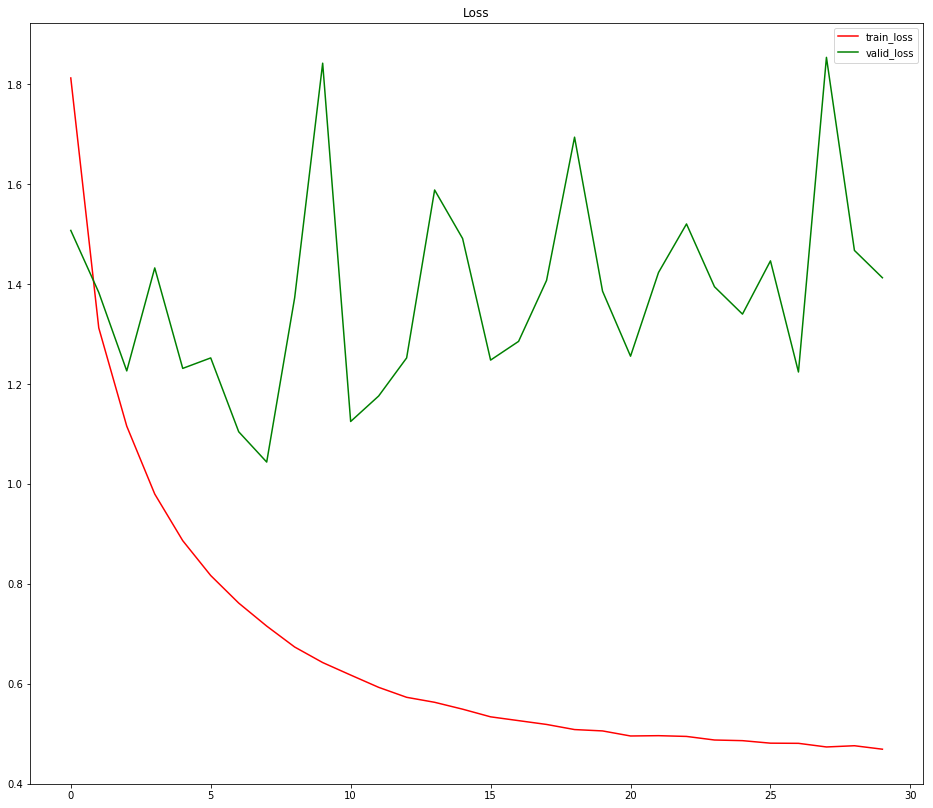

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k",'c','coral']

plt.figure(figsize=(16,14))
plt.plot(range(len(train_loss)),train_loss, '-', label='train_loss', color=color_bar[0])
plt.plot(range(len(valid_loss)),valid_loss, '-', label='valid_loss', color=color_bar[1])
plt.title("Loss")
plt.legend()
plt.show()

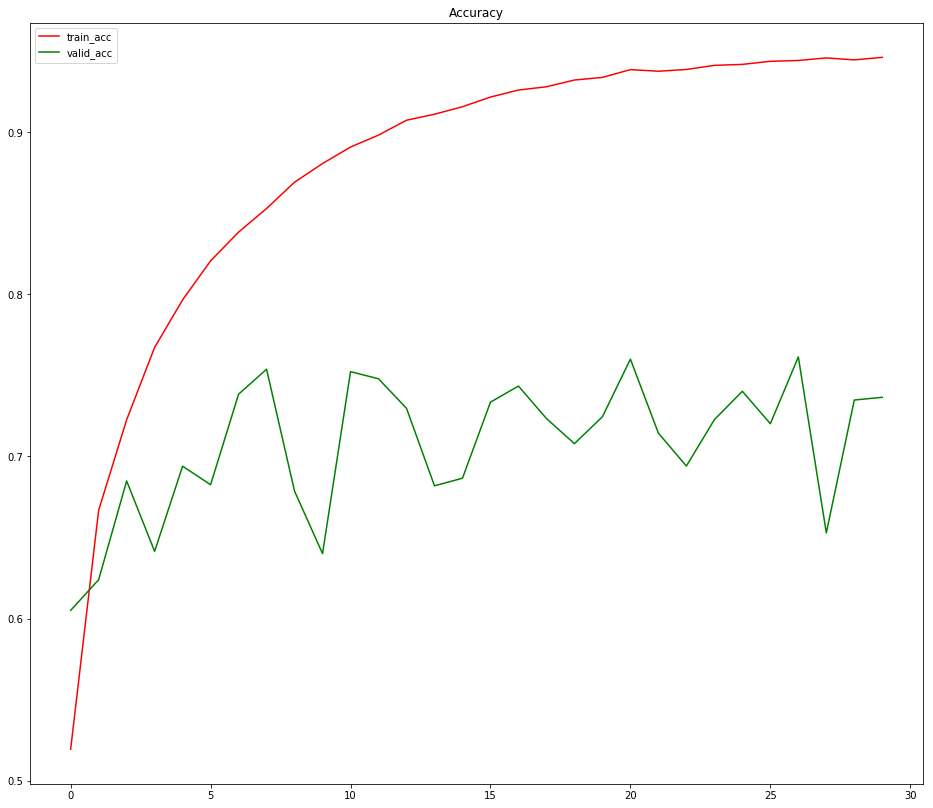

In [23]:

plt.figure(figsize=(16,14))
plt.plot(range(len(train_acc)),train_acc, '-', label='train_acc', color=color_bar[0])
plt.plot(range(len(valid_acc)),valid_acc, '-', label='valid_acc', color=color_bar[1])
plt.title("Accuracy")
plt.legend()
plt.show()